# Calculating deprojected Sersic profiles

The class `DeprojSersicDist` is used to compute profiles for the deprojected Sersic mass distributions.

First, we initialize an instance of `DeprojSersicDist`, and define a radius array.

In [1]:
import numpy as np
import sersic_profile_mass_VC as spm

# Define a radius array
r = np.arange(0., 10.5, 0.5)

# Deprojected Sersic mass distribution object
sprof = spm.DeprojSersicDist(total_mass=1.e11, Reff=5., n=1., q=0.2)

## Individual profiles

A number of methods are available to compute the various profiles of this mass distribution.

**Circular velocity**

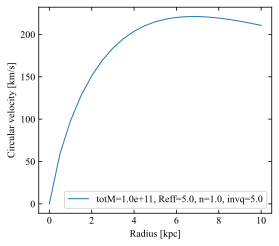

In [2]:
vcirc = sprof.v_circ(r)

# Make pseudo table for plotting
table_gather = {'r': r, 'vcirc': vcirc, 'n': sprof.n, 'q': sprof.q, 'invq': sprof.invq, 
                'total_mass': sprof.total_mass, 'Reff': sprof.Reff}

# Plot profile
%config InlineBackend.figure_format = 'svg'   # Tutorial plot configuration
spm.plot.plot_profiles_single_type(table_gather, prof_name='v_circ', 
                                   fig_kwargs={'figsize': (4., 8./9.*4.)})

**Enclosed mass (in 3D sphere)**

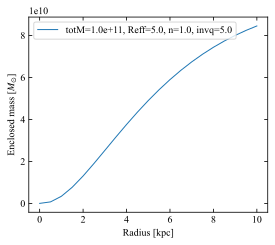

In [3]:
menc = sprof.enclosed_mass(r)

# Make pseudo table for plotting
table_gather = {'r': r, 'menc3D_sph': menc, 'n': sprof.n, 'q': sprof.q, 'invq': sprof.invq, 
                'total_mass': sprof.total_mass, 'Reff': sprof.Reff}

# Plot profile
spm.plot.plot_profiles_single_type(table_gather, prof_name='enclosed_mass', 
                                   fig_kwargs={'figsize': (4., 8./9.*4.)})

**Mass density**

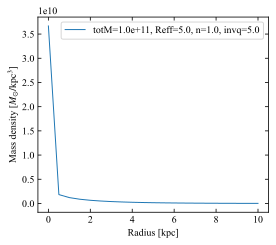

In [4]:
rho = sprof.density(r)

# Make pseudo table for plotting
table_gather = {'r': r, 'rho': rho, 'n': sprof.n, 'q': sprof.q, 'invq': sprof.invq, 
                'total_mass': sprof.total_mass, 'Reff': sprof.Reff}

# Plot profile
spm.plot.plot_profiles_single_type(table_gather, prof_name='density', 
                                   fig_kwargs={'figsize': (4., 8./9.*4.)})

**Log density slope**

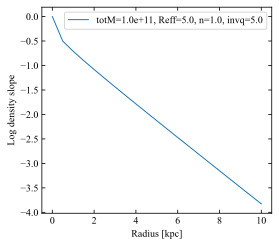

In [5]:
# Log density slope
dlnrho_dlnr = sprof.dlnrho_dlnr(r)

# Make pseudo table for plotting
table_gather = {'r': r, 'dlnrho_dlnr': dlnrho_dlnr, 'n': sprof.n, 
                'q': sprof.q, 'invq': sprof.invq, 
                'total_mass': sprof.total_mass, 'Reff': sprof.Reff}

# Plot profile
spm.plot.plot_profiles_single_type(table_gather, prof_name='dlnrho_dlnr', 
                                   fig_kwargs={'figure_figsize': (4., 8./9.*4.)})

**Projected mass surface density** *(i.e., 2D Sersic distribution)*

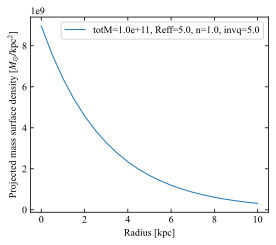

In [6]:
surfdens = sprof.surface_density(r)

# Make pseudo table for plotting
table_gather = {'r': r, 'surface_density': surfdens, 'n': sprof.n, 
                'q': sprof.q, 'invq': sprof.invq, 
                'total_mass': sprof.total_mass, 'Reff': sprof.Reff}

# Plot profile
spm.plot.plot_profiles_single_type(table_gather, prof_name='surface_density', 
                                   fig_kwargs={'figsize': (4., 8./9.*4.)})

**Projected enclosed** *(in ellipses; i.e., 2D Sersic curve-of-growth)*

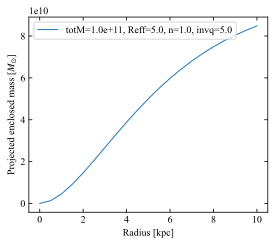

In [7]:
menc_2D = sprof.projected_enclosed_mass(r)

# Make pseudo table for plotting
table_gather = {'r': r, 'projected_enclosed_mass': menc_2D, 'n': sprof.n, 
                'q': sprof.q, 'invq': sprof.invq, 
                'total_mass': sprof.total_mass, 'Reff': sprof.Reff}

# Plot profile
spm.plot.plot_profiles_single_type(table_gather, prof_name='projected_enclosed_mass', 
                                   fig_kwargs={'figure_figsize': (4., 8./9.*4.)})

## Table of profiles

Finally, the method `DeprojSersicDist.profile_table(r)` can be used to return a full set of profiles calculated over the radius array $r$.

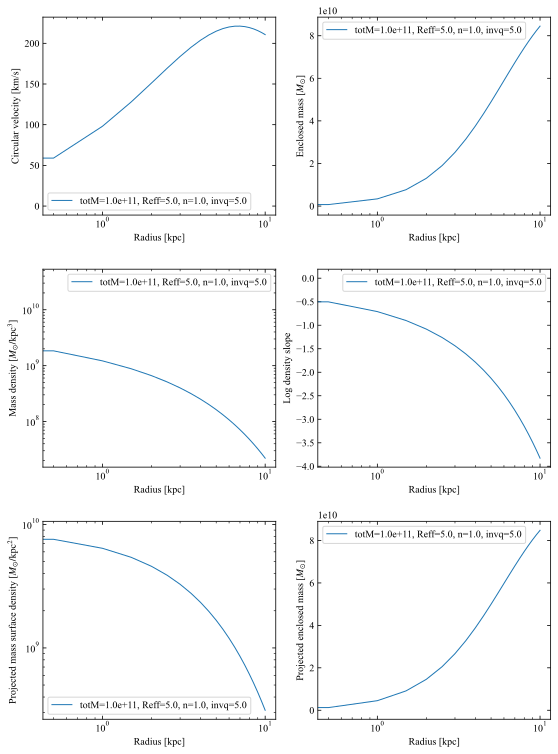

In [8]:
table = sprof.profile_table(r)

# Plot profiles
spm.plot.plot_profiles(table)

This procedure can be used to either recreate the pre-computed tables, 
or to compute profiles for values of `n` and `q` that are not already available.

In particular, this procedure can be scripted to compute new saved tables. 
This is easily accomplished with the combination of `DeprojSersicDist.profile_table()` and `sersic_profile_mass_VC.io.save_profile_table()`. 

An example of such a scripting approach can be seen in the functions in `sersic_profile_mass_VC.table_generation.py`